## Simple Regressor
좌표평면 위 그래프를 근사하는 회귀 모델

In [189]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [190]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(1,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    
    def forward(self, x):
        x = self.main(x)
        return x


In [191]:
model = Regressor()

In [192]:
learning_rate = 1e-3
batch_size = 100
epochs = 100

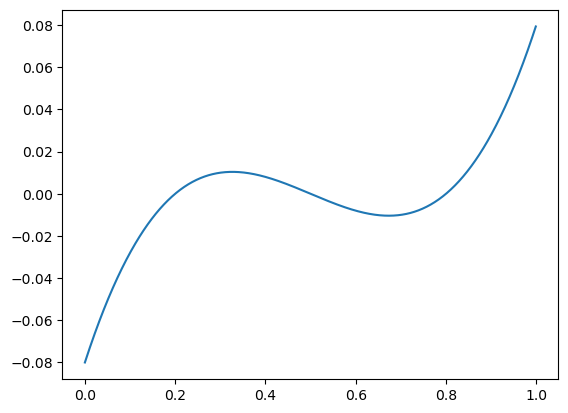

In [193]:
n = 1000
data_x = torch.tensor([i/n for i in range(n)])
data_y = (data_x - 0.2)*(data_x - 0.5)*(data_x - 0.8)
plt.plot(data_x,data_y)

In [194]:
class NumberDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return torch.tensor([self.x[idx]]), torch.tensor([self.y[idx]])

In [195]:
ds = NumberDataset(x,y)
dl = DataLoader(ds, batch_size = batch_size, shuffle=True)

In [196]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epoch 1, loss 0.018999088555574417
epoch 21, loss 0.16095565259456635
epoch 41, loss 0.11428385227918625
epoch 61, loss 0.16598448157310486
epoch 81, loss 0.18134279549121857


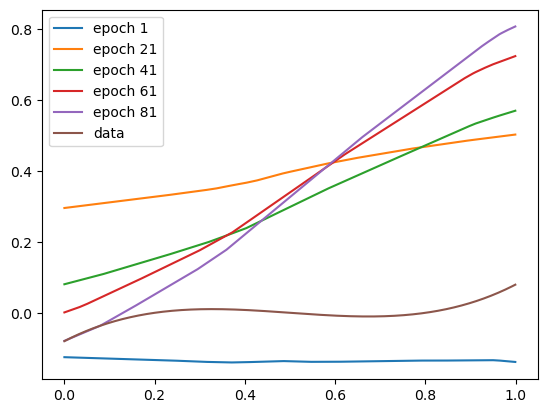

In [197]:
for epoch in range(epochs):
    model.train()
    for batch, (x,y) in enumerate(dl):
        pred = model(x)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 20 == 0:
            with torch.no_grad():
                pred_y = model(data_x.reshape(n,1))
                plt.plot(data_x, pred_y, label = f'epoch {epoch+1}')
                print(f'epoch {epoch+1}, loss {loss_fn(pred_y, data_y.reshape(n,1))}')
plt.plot(data_x, data_y, label = f'data')
plt.legend()